In [1]:
import SimpleITK as sitk
import numpy as np
import csv
import scipy
from glob import glob
import pandas as pd
from scipy import ndimage
from tqdm import tqdm 
import pandas as pd
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import dicom
import scipy.misc
import numpy as np
from skimage import measure, morphology, segmentation
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from numba import autojit
from PIL import Image
import cv2
import random
from utils_3d import *
from paths import *

%matplotlib inline


Using TensorFlow backend.


# 看下图是否正常

In [2]:
src = '/Volumes/solo/ali/Data/val_mask/lung_mask_rand/'
src1 = '/Volumes/solo/ali/Data/val_mask/nodule_mask_rand/'
patients = [x for x in os.listdir(src) if 'rand' in x]

In [3]:
sample = random.sample(patients, 1)[0]
sample

'rand_LKDS-00210_0018_00.npy'

In [4]:
img1 = np.load(src + sample)

In [5]:
f, plots = plt.subplots(11, 11, sharex='all', sharey='all', figsize=(20, 20))
# matplotlib is drunk

for i in range(121):
    plots[i // 11, i % 11].axis('off')
    plots[i // 11, i % 11].imshow(img1[7+i], cmap=plt.cm.bone)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
img2 = np.load(src1 + sample)

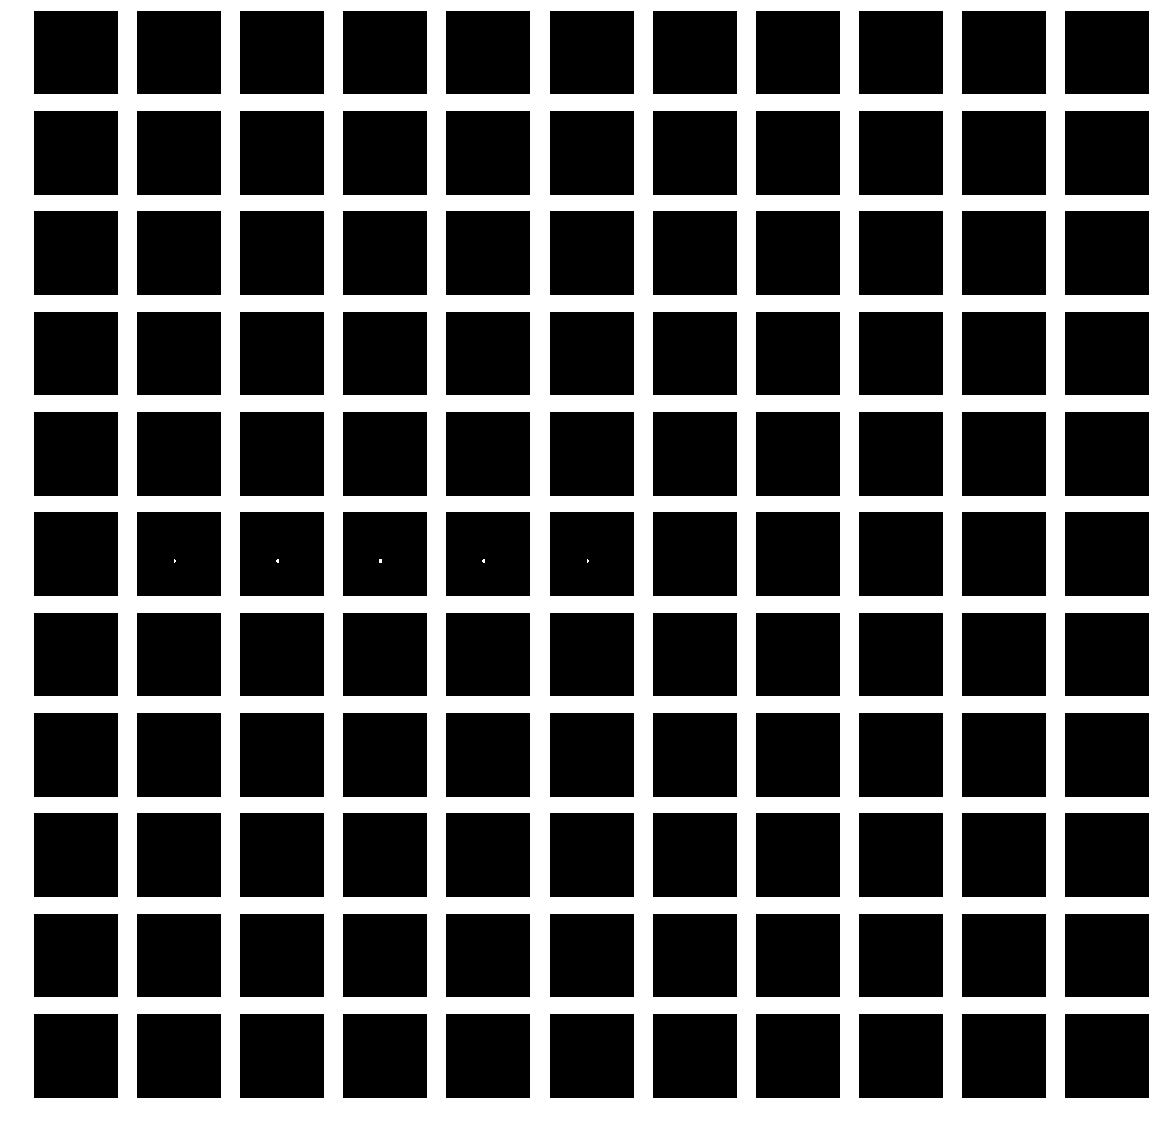

In [7]:
f, plots = plt.subplots(11, 11, sharex='all', sharey='all', figsize=(20, 20))
# matplotlib is drunk

for i in range(121):
    plots[i // 11, i % 11].axis('off')
    plots[i // 11, i % 11].imshow(img2[7+i], cmap=plt.cm.bone)

In [8]:
img3 = img1 * img2

([array([  324.,  1424.,  1296.,   994.,  1121.,  1563.,  2393.,  2954.,
          2378.,  1937.]),
  array([  320.,  1192.,  1389.,  1098.,  1063.,  1547.,  2591.,  3004.,
          2362.,  1818.]),
  array([  314.,  1369.,  1290.,  1003.,  1091.,  1556.,  2628.,  3010.,
          2325.,  1798.]),
  array([  316.,  1374.,  1304.,   991.,  1103.,  1566.,  2579.,  3035.,
          2411.,  1705.]),
  array([  308.,  1170.,  1432.,   972.,  1065.,  1543.,  2779.,  3121.,
          2407.,  1587.]),
  array([  331.,  1438.,  1203.,   960.,  1156.,  1628.,  2641.,  3111.,
          2304.,  1612.]),
  array([  271.,  1173.,  1355.,  1016.,  1052.,  1620.,  2707.,  3242.,
          2366.,  1582.]),
  array([  283.,  1294.,  1279.,   931.,  1130.,  1694.,  2792.,  3002.,
          2296.,  1683.]),
  array([  261.,  1304.,  1218.,   917.,  1187.,  1684.,  2656.,  3058.,
          2380.,  1719.]),
  array([  230.,  1166.,  1363.,   893.,  1071.,  1633.,  2779.,  3200.,
          2373.,  1676.]),


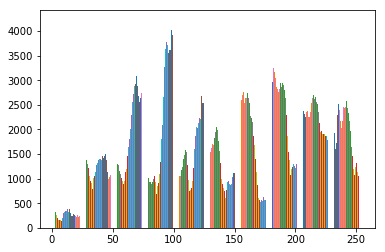

In [9]:
plt.hist(img1.tolist(),bins=10)

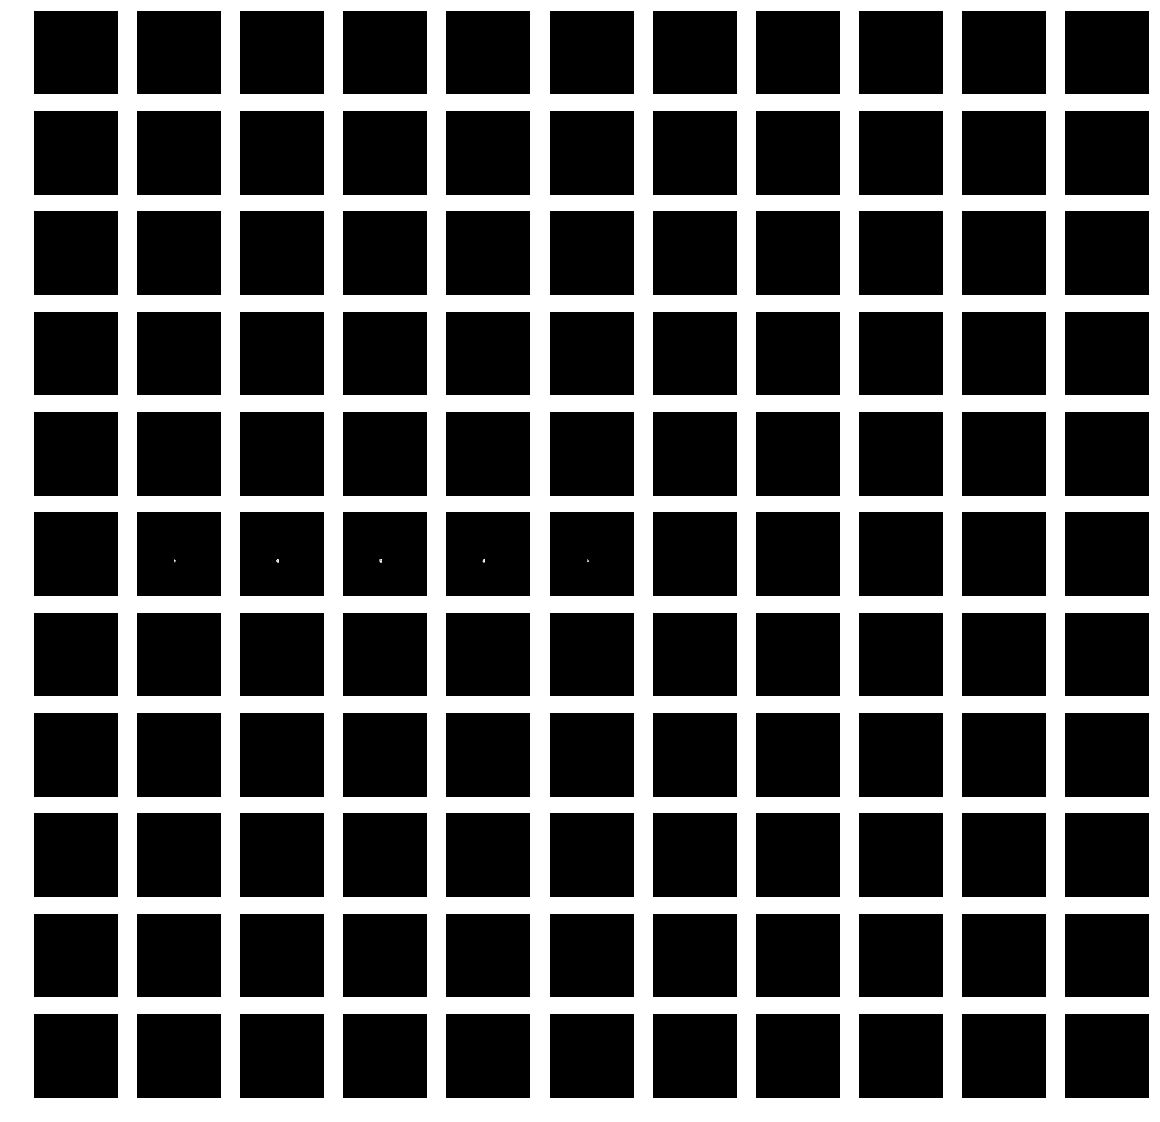

In [10]:
f, plots = plt.subplots(11, 11, sharex='all', sharey='all', figsize=(20, 20))
# matplotlib is drunk

for i in range(121):
    plots[i // 11, i % 11].axis('off')
    plots[i // 11, i % 11].imshow(img3[7+i], cmap=plt.cm.bone)

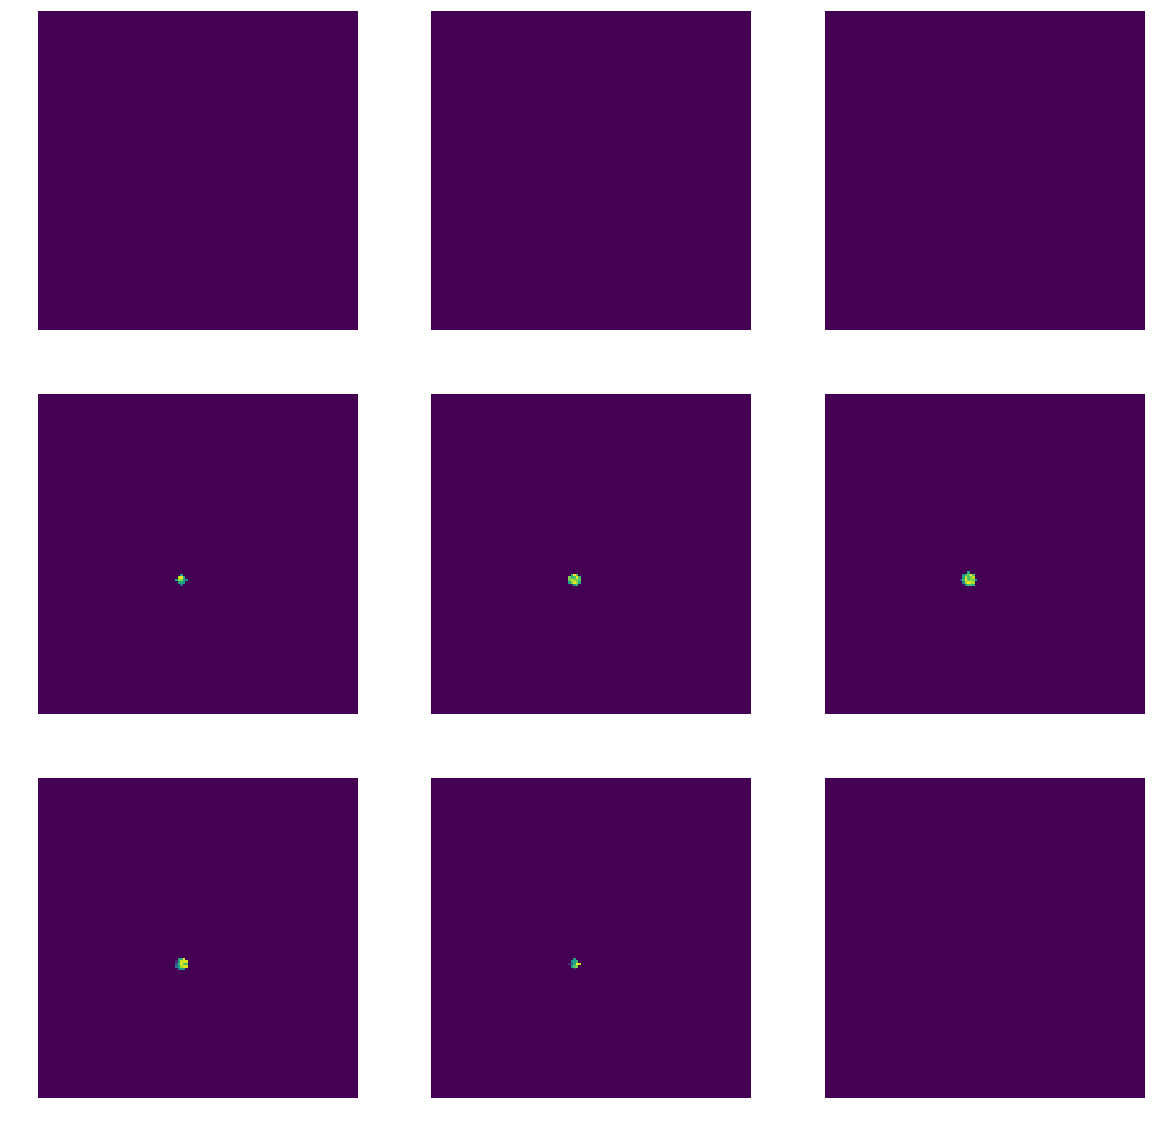

In [16]:
f, plots = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(20, 20))
# matplotlib is drunk

for i in range(9):
    plots[i // 3, i % 3].axis('off')
    plots[i // 3, i % 3].imshow(img3[60+i])

# 有没有孔

In [12]:
cc = np.squeeze(img2)
cc = label(cc)

In [13]:
len(np.unique(cc))

2

# 孔正常的比例

In [14]:
num = 0
all_nb = 0
for i in tqdm(patients):
    img = np.load(src1 + i)
    cc = np.squeeze(img)
    cc = label(cc)
    all_nb += 1
    if len(np.unique(cc)) > 1:
        num += 1
perc = num*1.0/all_nb
print perc ,all_nb
    

100%|██████████| 2311/2311 [09:24<00:00,  4.35it/s]

0.992211163998 2311


# 负样本比例

In [15]:
negs = [x for x in os.listdir(src) if 'neg' in x]
perc1 = len(negs)*1.0/all_nb
print perc1

0.346170488966
